<a href="https://colab.research.google.com/github/asokraju/CDPRgym/blob/main/test_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#install

In [5]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import scipy as scp
from scipy import linalg
import math as m
from matplotlib import pyplot as plt
from numpy.core.memmap import dtype


import gym
from gym import logger, spaces



In [8]:
!git clone https://github.com/asokraju/CDPRgym.git

fatal: destination path 'CDPRgym' already exists and is not an empty directory.


In [4]:
!ls

CDPRgym  sample_data


# Either load directly or make use of gym registration

In [10]:
from CDPRgym.envs.cdpr import CDPRenv

OR

In [11]:
!cd CDPRgym/

In [13]:
env =  gym.make("CDPR-v0")
#or
# env = CDPRenv()

# testing

In [15]:
obs = env.reset()
dones = False
S = [obs]
while not dones:
#     action, _states = model_ppo.predict(obs, deterministic=False)
    actions = env.action_space.sample()
    obs, rewards, dones, info = env.step(actions)
    print(env.steps, rewards, obs)
    S.append(obs)

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:228: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  "Core environment is written in old step API which returns one bool instead of two. "
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:142: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  f"{pre} was expecting numpy array dtype to be {observation_space.dtype}, actual type: {obs.dtype}"
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


1 -0.003536692071628483 [ 0.43422495  0.33088738  0.79052764 -0.09036315  0.28132908 -0.10225441
 -0.00161953  0.00791175 -0.11444656  0.23855524  1.27903148  0.14120755
  0.19063608  0.53030612  0.44603128  0.21943501  0.49378848  0.21034639
  0.27901958]
2 -0.007157667130815698 [ 0.42764147  0.34886588  0.77898135 -0.16998877  0.42899958  0.05993525
 -0.00940649  0.02374625 -0.19380383  0.3864424   1.24553165  0.88137243
  0.8965686   0.60587386  0.96191259  0.22188501  0.49133848  0.21279639
  0.28146958]
3 -0.010745283726317927 [ 0.41825241  0.37244013  0.68732389 -0.21339401  0.55448491 -3.02880413
 -0.01998555  0.0451874  -0.23694072  0.51214437  0.95735718  0.25561256
  0.62461134  0.35134758  0.72666202  0.21943501  0.48888848  0.21524639
  0.27901958]
4 -0.01569976505995112 [ 0.40688745  0.403742    0.71739693 -0.2468352   0.72282648  0.66604038
 -0.03252701  0.07436705 -0.27011355  0.6807026   1.05905265  0.63073398
  0.88277845  0.51521972  0.9689429   0.22188501  0.48643848

In [17]:
S = np.array(S)
Des = env.X_des.T

Text(0.5, 1.0, 'xy')

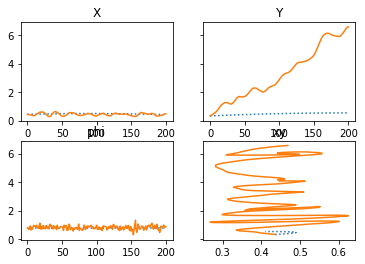

In [18]:

f, ax = plt.subplots(2, 2, sharey=True)

ax[0,0].plot(env.X_des.T[:, 0],linestyle='dotted')
ax[0,0].plot(S[:,0])
ax[0,0].set_title('X')

ax[0,1].plot(env.X_des.T[:, 1],linestyle='dotted')
ax[0,1].plot(S[:,1])
ax[0,1].set_title('Y')

ax[1,0].plot(env.X_des.T[:, 2],linestyle='dotted')
ax[1,0].plot(S[:,2])
ax[1,0].set_title('phi')

ax[1,1].plot(env.X_des.T[:, 0], env.X_des.T[:, 1],linestyle='dotted')
ax[1,1].plot(S[:,0], S[:,1])
ax[1,1].set_title('xy')

# Loading an RL model

In [ ]:
from stable_baselines3 import DQN, TD3, PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
# path = "logs/td3/CDPR-v0_5/best_model.zip"
# path_ppo = "logs/ppo/CDPR-v0_4/best_model.zip"
path = "best_model.zip"
model = TD3.load(path)
eval_env = gym.make("CDPR-v0")

In [ ]:
# Random Agent, before training
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

In [ ]:
env = CDPRenv()
obs = env.reset()
dones = False
S = [obs]
while not dones:
    actions, _states = model.predict(obs, deterministic=False)
    # actions = env.action_space.sample()
    obs, rewards, dones, info = env.step(actions)
    print(env.steps, rewards, obs)
    S.append(obs)


In [ ]:
S = np.array(S)
Des = env.X_des.T

In [ ]:
f, ax = plt.subplots(2, 2, sharey=True)

ax[0,0].plot(env.X_des.T[:, 0],linestyle='dotted')
ax[0,0].plot(S[:,0])
ax[0,0].set_title('X')

ax[0,1].plot(env.X_des.T[:, 1],linestyle='dotted')
ax[0,1].plot(S[:,1])
ax[0,1].set_title('Y')

ax[1,0].plot(env.X_des.T[:, 2],linestyle='dotted')
ax[1,0].plot(S[:,2])
ax[1,0].set_title('phi')

ax[1,1].plot(env.X_des.T[:, 0], env.X_des.T[:, 1],linestyle='dotted')
ax[1,1].plot(S[:,0], S[:,1])
ax[1,1].set_title('xy')